In [2]:
print('Hello')

Hello


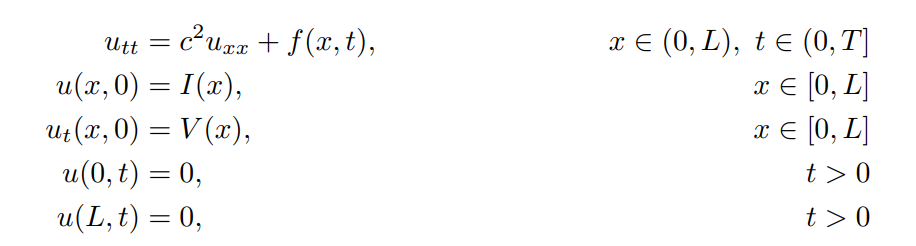

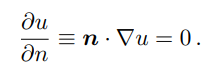

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
x = np.linspace(0., 50., 5_000)
t = np.linspace(0., 5., 5_000)

dx = x[1] - x[0]
dt = t[1] - t[0]

c0 = 9.0
C = c0*dt/dx
print(C)

u = np.zeros_like(x)
print('u shape ', u.shape)
print('x shape ', x.shape)
print('t shape ', t.shape)

0.9
u shape  (5000,)
x shape  (5000,)
t shape  (5000,)


In [6]:
print('dx ', dx)
print('dt ', dt)

dx  0.010002000400080016
dt  0.0010002000400080016


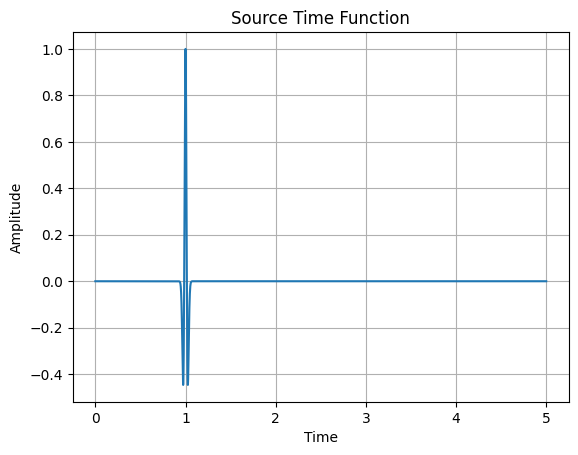

In [ ]:
def mexican_hat(x, x0, sigma, amp):
    r = (x - x0) / sigma
    return amp * (1 - r**2) * np.exp(-0.5 * r**2)


src_p = 2_500
f = np.zeros_like(t)
f[50:2000] = mexican_hat(t[50:2000], 1, 0.015, 1.0)

plt.plot(t, f)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Source Time Function')
plt.grid()
plt.show()

In [ ]:
all_u_s = []
u_prev = np.zeros_like(x)
u_curr = np.zeros_like(x)
for i in tqdm(range(2, len(t))):
    u_next = np.zeros_like(u)
    for j in range(0, len(x)):
        if j == 0:
            u_next[j] = - u_prev[j] + 2*u_curr[j] + (C**2)*(u_curr[j+1] - 2*u_curr[j] + u_curr[j+1])
        elif j == len(x) - 1:
            u_next[j] = - u_prev[j] + 2*u_curr[j] + (C**2)*(u_curr[j - 1] - 2*u_curr[j] + u_curr[j - 1])
        else:
            u_next[j] = - u_prev[j] + 2*u_curr[j] + (C**2)*(u_curr[j+1] - 2*u_curr[j] + u_curr[j - 1])
    u_next[src_p] += f[i]
    u_prev = u_curr
    u_curr = u_next
    all_u_s.append(u_curr.copy())

  0%|          | 0/4998 [00:00<?, ?it/s]

100%|██████████| 4998/4998 [00:29<00:00, 169.62it/s]


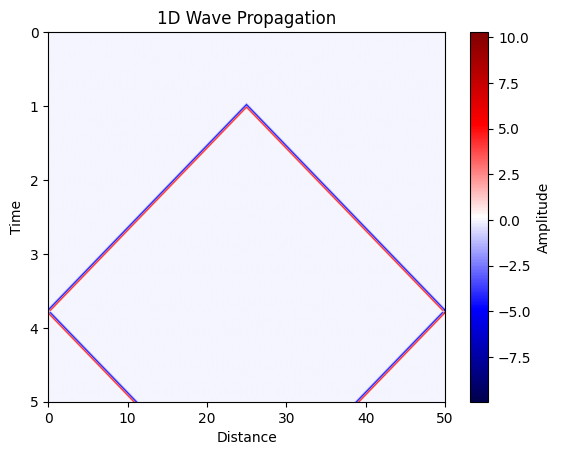

In [6]:
all_u = np.array(all_u_s)
plt.imshow(all_u, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='seismic')
plt.colorbar(label='Amplitude')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.title('1D Wave Propagation')
plt.show()

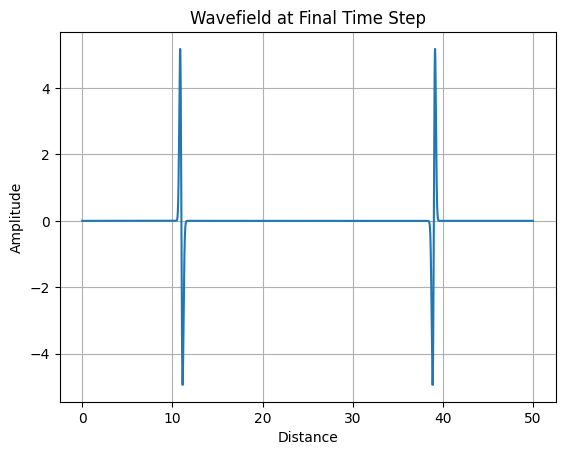

In [7]:
plt.plot(x, u_curr)
plt.xlabel('Distance') 
plt.ylabel('Amplitude')
plt.title('Wavefield at Final Time Step')
plt.grid()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def make_sampled_wave_gif(all_u_s, x=None, fps=20, outfile="wave_sampled.gif",
                          ylim="auto", dpi=120, n_frames=200):
    """
    Sample ~n_frames evenly from all_u_s and save as GIF.

    Parameters
    ----------
    all_u_s : list[np.ndarray]
        Time history of wave, each element shape (N,).
    x : np.ndarray | None
        Spatial coordinates, defaults to np.arange(N).
    fps : int
        Frames per second.
    outfile : str
        Output GIF filename.
    ylim : "auto" or (min,max)
        y-limits.
    dpi : int
        Resolution for output.
    n_frames : int
        Number of frames to sample.
    """
    assert len(all_u_s) > 0, "all_u_s is empty."
    N = all_u_s[0].shape[0]
    if x is None:
        x = np.arange(N)

    # choose ~n_frames evenly spaced indices
    idxs = np.linspace(0, len(all_u_s)-1, n_frames, dtype=int)
    frames = [all_u_s[i] for i in idxs]

    # auto y-limits
    if ylim == "auto":
        y_min = min(np.min(f) for f in frames)
        y_max = max(np.max(f) for f in frames)
        pad = 0.05 * max(1e-12, (y_max - y_min))
        ylim = (y_min - pad, y_max + pad)

    fig, ax = plt.subplots()
    line, = ax.plot(x, frames[0])
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(*ylim)
    ax.set_xlabel("x")
    ax.set_ylabel("u(x,t)")
    title = ax.set_title("Time step 0")

    def update(k):
        line.set_ydata(frames[k])
        title.set_text(f"Frame {k} (original step {idxs[k]})")
        return line, title

    ani = animation.FuncAnimation(fig, update, frames=len(frames), blit=True)
    ani.save(outfile, writer="pillow", fps=fps, dpi=dpi)
    plt.close(fig)
    return outfile

# --- Usage ---
gif_path = make_sampled_wave_gif(all_u_s, x=x, fps=15, outfile="wave_sampled.gif", n_frames=200)
print("Saved:", gif_path)


Saved: wave_sampled.gif
